## pca 

In [1]:
import numpy as np, pandas as pd
data = pd.read_csv("Iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

y = data.pop("iris")

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.copy()
x = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pc2 = PCA(n_components=2, random_state=42)

In [7]:
newdata = pc2.fit_transform(x)

In [8]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [9]:

df_final = pd.concat([df, y], axis=1)

In [10]:
df_final.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [11]:

import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\DK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\DK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


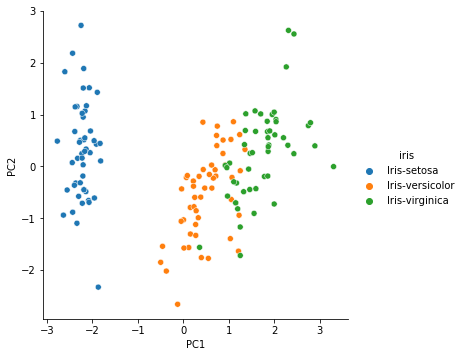

In [12]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "iris", size=5)

## BIRCH

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch


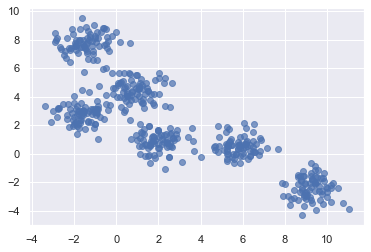

In [14]:
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [15]:
 brc = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
brc.fit(X)

Birch(n_clusters=None, threshold=1.5)

In [16]:
Birch(n_clusters=None, threshold=1.5)
labels = brc.predict(X)

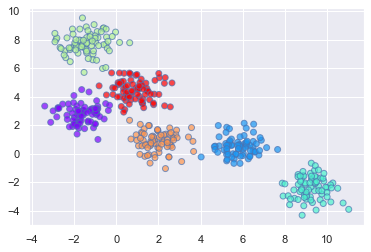

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

## Nearest neighbor outlier detection

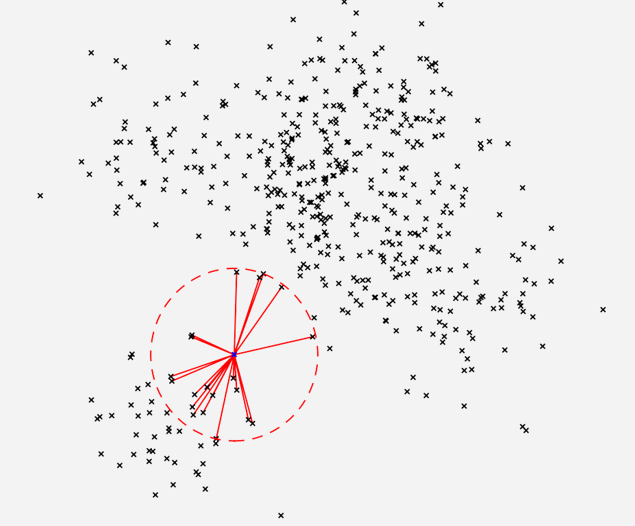

## Histogram-Based Outlier Detection

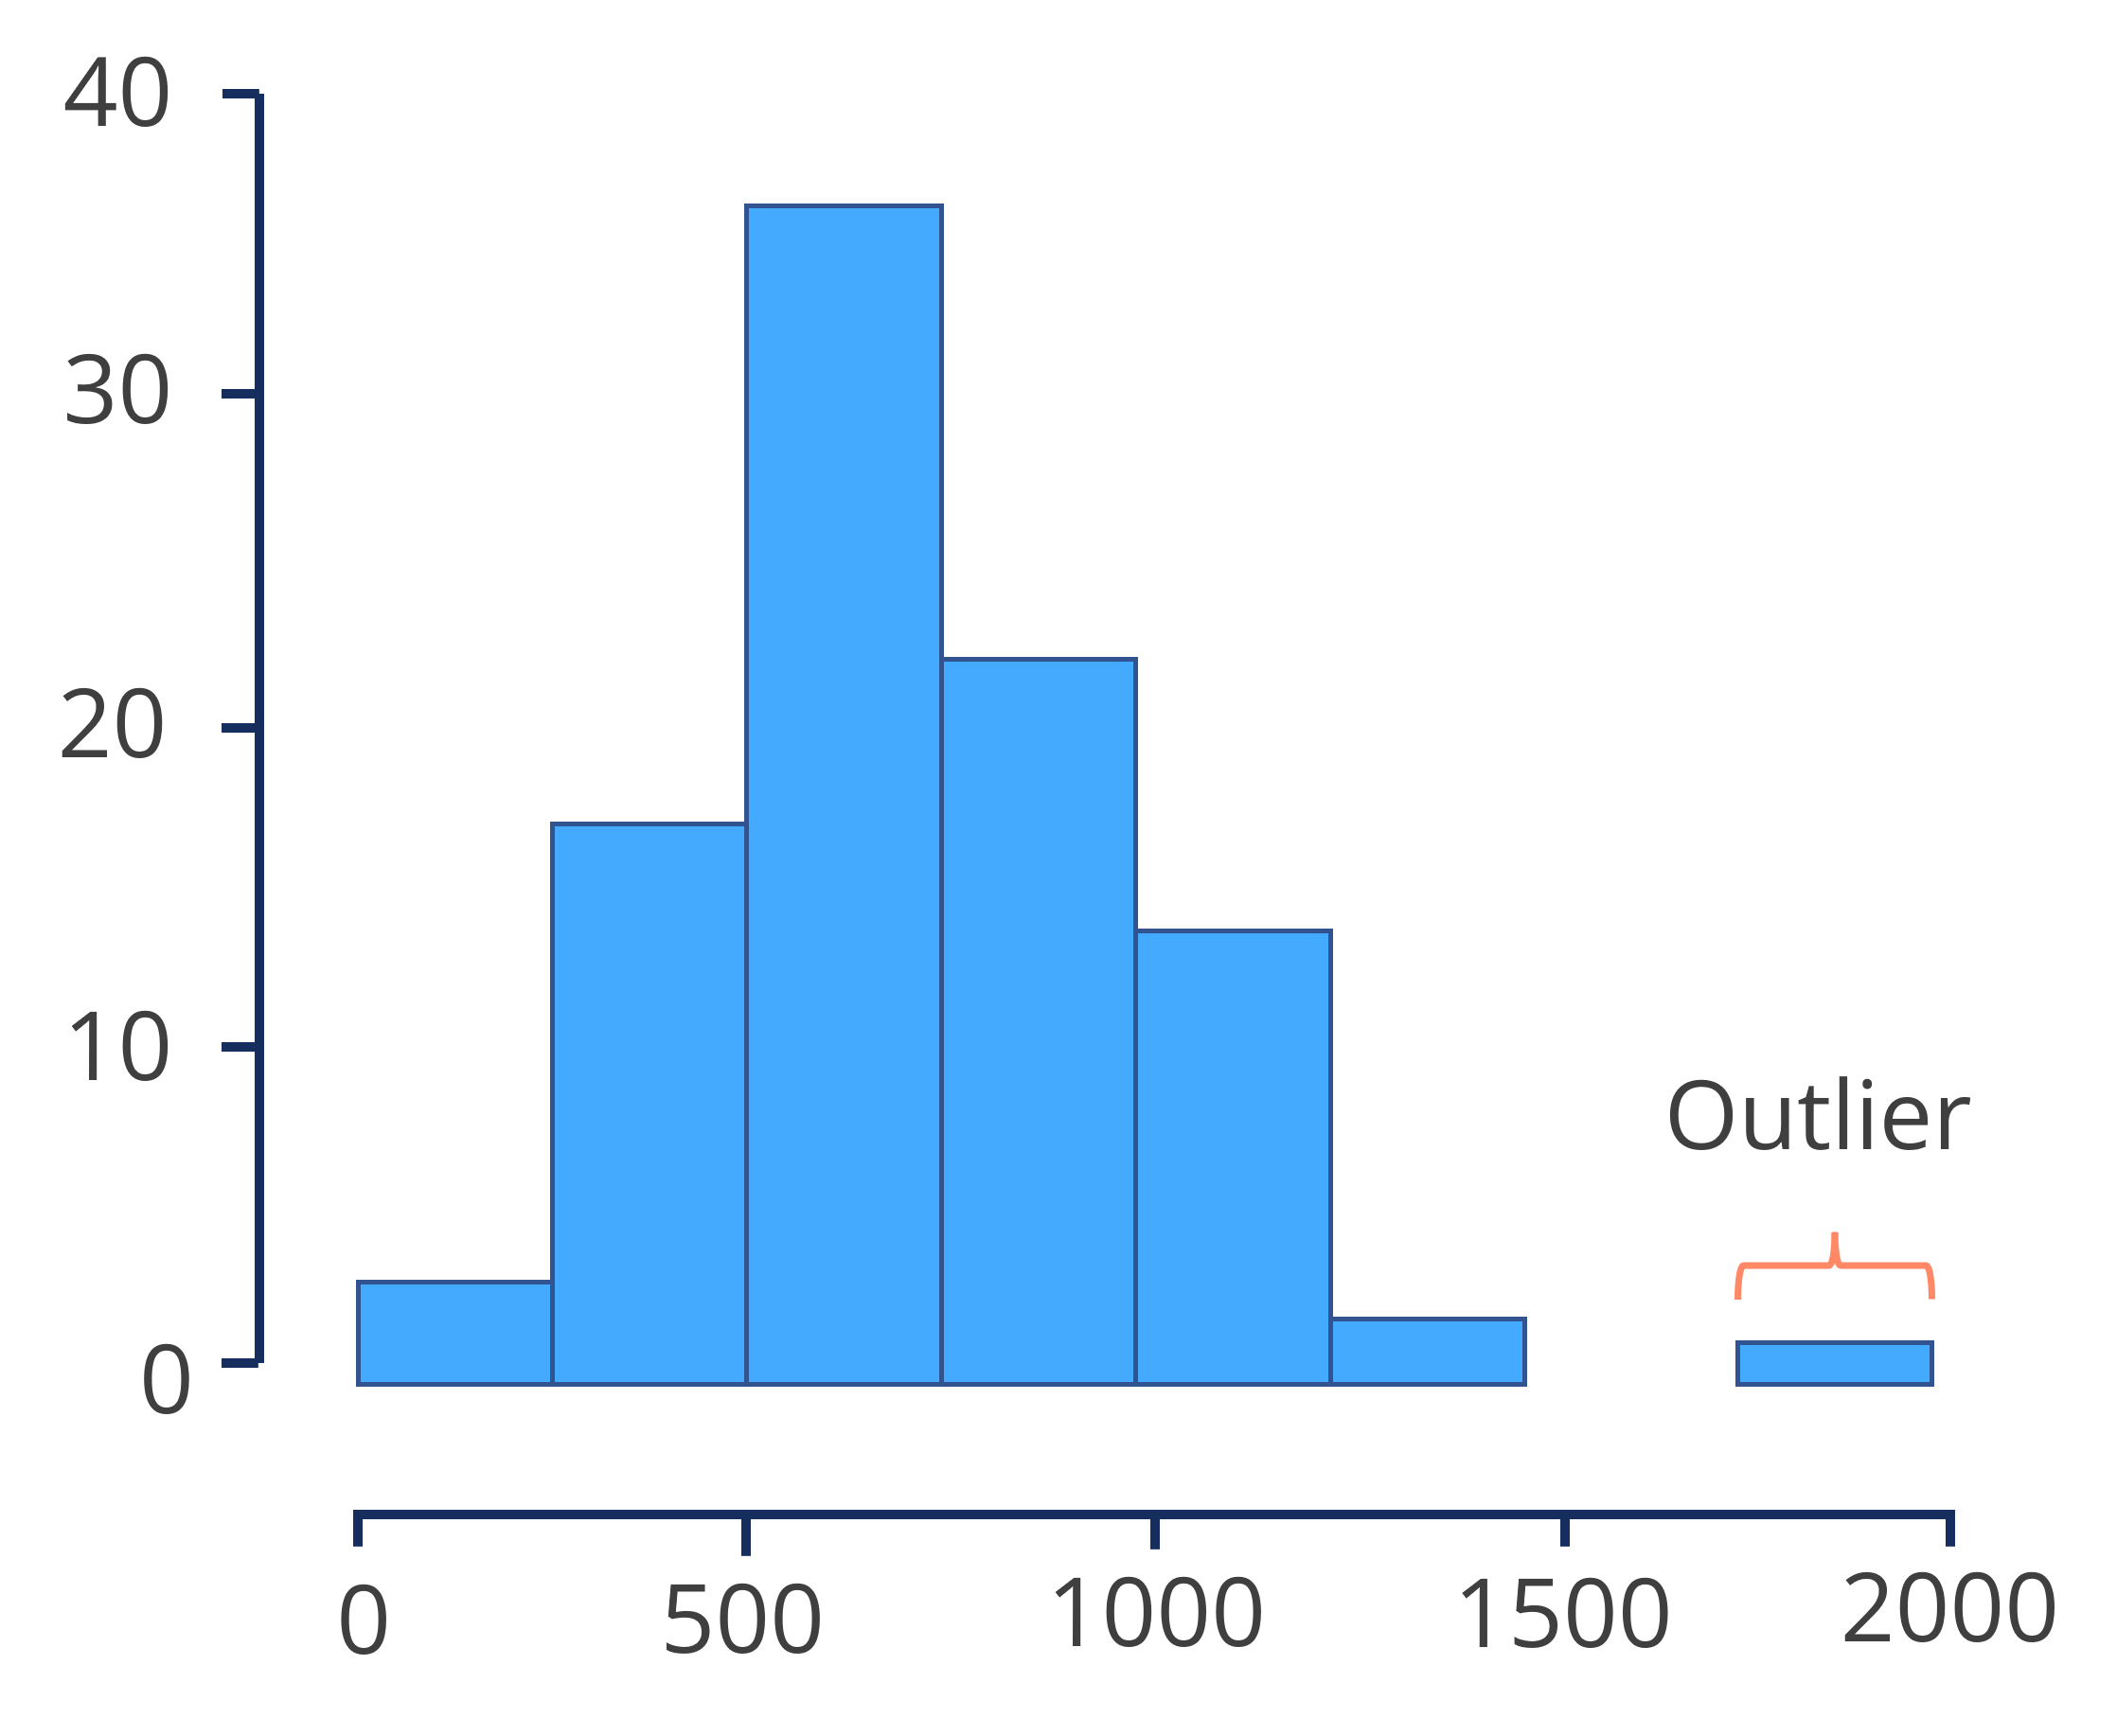

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


Bad key "text.kerning_factor" on line 4 in
C:\Users\DK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df = data[["sepal_length", "sepal_width"]]

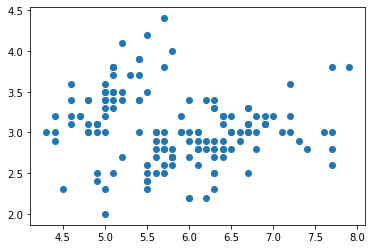

In [4]:
plt.scatter(df["sepal_length"], df["sepal_width"])

In [6]:
nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(df)

NearestNeighbors(n_neighbors=3)

In [8]:
distances, indexes = nbrs.kneighbors(df)

In [9]:
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131], dtype=int64),)

In [11]:
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131], dtype=int64),)

In [12]:
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


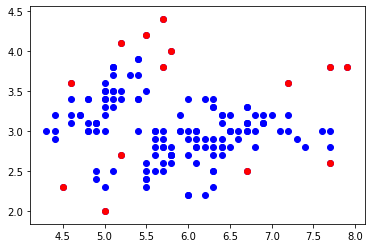

In [14]:
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b")
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")

## SVD

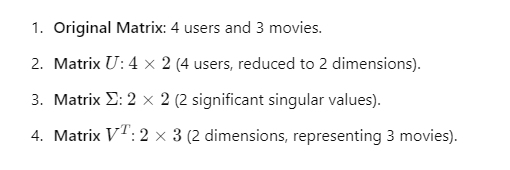

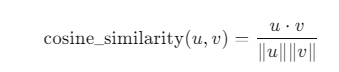

In [38]:
import numpy as np
from numpy.linalg import norm

# Define the user-movie rating matrix A
A = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4]
])

# Perform SVD
k = 2  # Number of components to keep
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)

# Truncate matrices
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
VT_k = VT[:k, :]

# Print truncated matrices
print("U_k matrix (left singular vectors, truncated):")
print(U_k)
print("\nSigma_k matrix (singular values, truncated):")
print(Sigma_k)
print("\nVT_k matrix (right singular vectors, truncated):")
print(VT_k)

# Function to calculate cosine similarity
def cosine_similarity(u, v):
    return np.dot(u, v) / (norm(u) * norm(v))

# Calculate and print cosine similarities between users
n_users = 5
similarities = np.zeros((n_users, n_users))

for i in range(n_users):
    for j in range(n_users):
        similarities[i, j] = cosine_similarity(U_k[i], U_k[j])

print("\nUser Similarities (based on truncated U):")
print(similarities)


U_k matrix (left singular vectors, truncated):
[[-0.43689593 -0.66924125]
 [-0.29717498 -0.44308727]
 [-0.51589728  0.13631518]
 [-0.39999635  0.11077382]
 [-0.54282768  0.5700326 ]]

Sigma_k matrix (singular values, truncated):
[[9.03171974 0.        ]
 [0.         6.22925557]]

VT_k matrix (right singular vectors, truncated):
[[-0.47488998 -0.26234348 -0.3005118  -0.78444124]
 [-0.78203025 -0.20891356  0.45754472  0.36801718]]

User Similarities (based on truncated U):
[[ 1.          0.99992279  0.31459653  0.30333521 -0.22942044]
 [ 0.99992279  1.          0.32636797  0.31515297 -0.2173075 ]
 [ 0.31459653  0.32636797  1.          0.9999299   0.85173231]
 [ 0.30333521  0.31515297  0.9999299   1.          0.85787674]
 [-0.22942044 -0.2173075   0.85173231  0.85787674  1.        ]]


In [39]:
A_reconstructed = np.dot(U, np.dot(Sigma_matrix, VT))

In [40]:
A_reconstructed


array([[ 5.00000000e+00,  3.00000000e+00,  2.22044605e-15,
         1.00000000e+00],
       [ 4.00000000e+00, -4.44089210e-16,  9.99200722e-16,
         1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00, -1.33226763e-15,
         5.00000000e+00],
       [ 1.00000000e+00,  1.88737914e-15, -9.43689571e-16,
         4.00000000e+00],
       [ 3.99680289e-15,  1.00000000e+00,  5.00000000e+00,
         4.00000000e+00]])

In [41]:
# Calculate movie similarities
n_movies = 4
movie_similarities = np.zeros((n_movies, n_movies))

# Function to calculate cosine similarity
def cosine_similarity(v, w):
    return np.dot(v, w) / (norm(v) * norm(w))

# Calculate and print cosine similarities between movies
for i in range(n_movies):
    for j in range(n_movies):
        movie_similarities[i, j] = cosine_similarity(VT_k[:, i], VT_k[:, j])

print("\nMovie Similarities:")
print(movie_similarities)


Movie Similarities:
[[ 1.          0.93849244 -0.42948802  0.10686996]
 [ 0.93849244  1.         -0.0912405   0.44361891]
 [-0.42948802 -0.0912405   1.          0.8520013 ]
 [ 0.10686996  0.44361891  0.8520013   1.        ]]


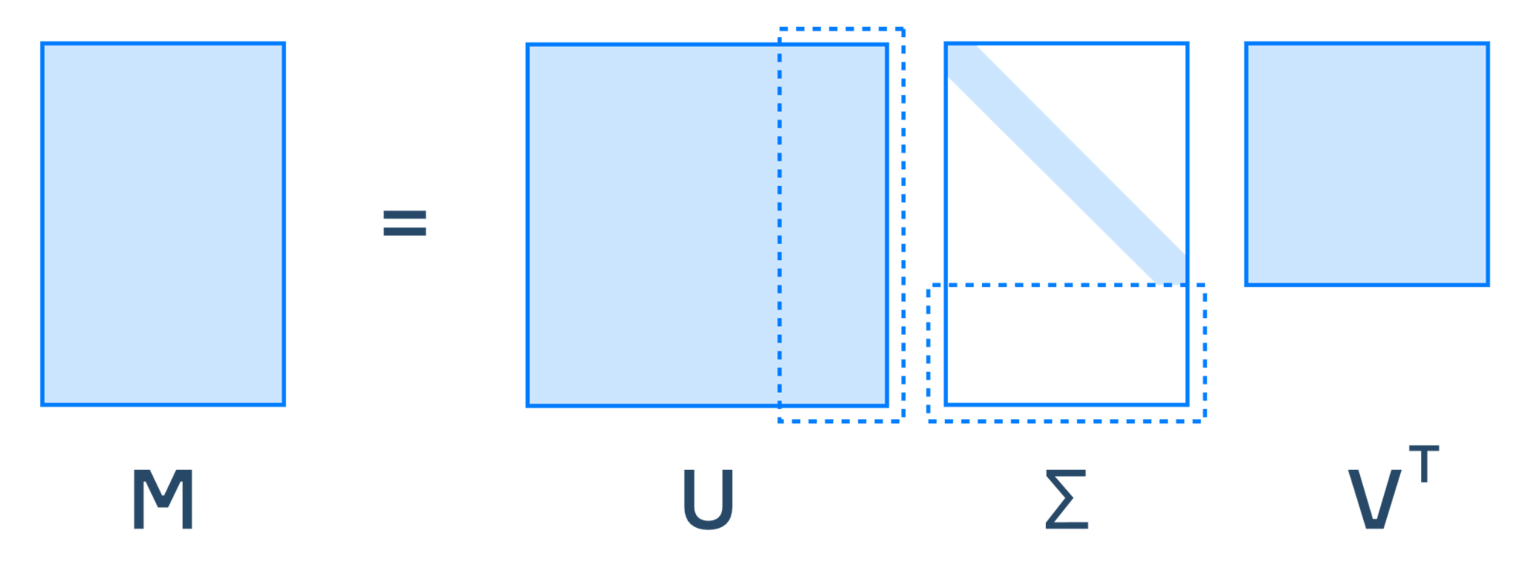

## smote

In [42]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a sample DataFrame
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'class': np.random.choice([0, 1], size=100, p=[0.1, 0.9])
}

df = pd.DataFrame(data)
print("Original dataset:")
print(df.head())

# Check class distribution
print('Original dataset shape %s' % Counter(df['class']))

# Separate features and target variable
X = df[['feature1', 'feature2']]
y = df['class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Create a new DataFrame with balanced classes
df_resampled = pd.DataFrame(X_res, columns=['feature1', 'feature2'])
df_resampled['class'] = y_res

# Check class distribution after SMOTE
print('Resampled dataset shape %s' % Counter(df_resampled['class']))
print("\nResampled dataset:")
print(df_resampled.head())


Original dataset:
   feature1  feature2  class
0  0.168710  0.548460      1
1  0.327569  0.636236      1
2  0.713867  0.666171      0
3  0.078692  0.402162      1
4  0.870167  0.166894      0
Original dataset shape Counter({1: 89, 0: 11})
Resampled dataset shape Counter({1: 89, 0: 89})

Resampled dataset:
   feature1  feature2  class
0  0.168710  0.548460      1
1  0.327569  0.636236      1
2  0.713867  0.666171      0
3  0.078692  0.402162      1
4  0.870167  0.166894      0


## cohes kappa

In [43]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Generate random labels for two annotators
annotator1 = np.random.randint(0, 2, size=100)  # Random labels: 0 or 1
annotator2 = np.random.randint(0, 2, size=100)  # Random labels: 0 or 1

# Print the generated labels for demonstration
print("Annotator 1 labels:", annotator1[:10])
print("Annotator 2 labels:", annotator2[:10])


Annotator 1 labels: [0 0 1 0 0 1 0 1 0 1]
Annotator 2 labels: [1 0 0 1 1 1 0 0 0 0]


In [44]:
# Compute Cohen's kappa
kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Cohen's kappa: {kappa:.2f}")


Cohen's kappa: 0.11


In [49]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Generate perfect agreement labels for two annotators
annotator1 = np.array([1, 0, 1, 0, 1])  # Annotator 1 labels
annotator2 = np.array([1, 0, 1, 0, 1])  # Annotator 2 labels

# Compute Cohen's kappa
kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Cohen's kappa: {kappa:.2f}")


Cohen's kappa: 1.00


In [50]:
# annotator1

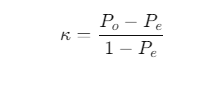